In [1]:
# Analysing the MATCH LEVEL summaries - total runs, wickets, strike rate and Identify patterns by year, team and venue


/tmp/ipykernel_2958/1535038489.py:7: DtypeWarning: Columns (28,29,30,31,43,46,47,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/abantika/Data Analytics/Match_Insights/Data/IPL.csv")


Shape before Cleaning: (278205, 64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 64 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         278205 non-null  int64  
 1   match_id           278205 non-null  int64  
 2   date               278205 non-null  object 
 3   match_type         278205 non-null  object 
 4   event_name         278205 non-null  object 
 5   innings            278205 non-null  int64  
 6   batting_team       278205 non-null  object 
 7   bowling_team       278205 non-null  object 
 8   over               278205 non-null  int64  
 9   ball               278205 non-null  int64  
 10  ball_no            278205 non-null  float64
 11  batter             278205 non-null  object 
 12  bat_pos            278205 non-null  int64  
 13  runs_batter        278205 non-null  int64  
 14  balls_faced        278205 non-null  int64  
 15  bowler         

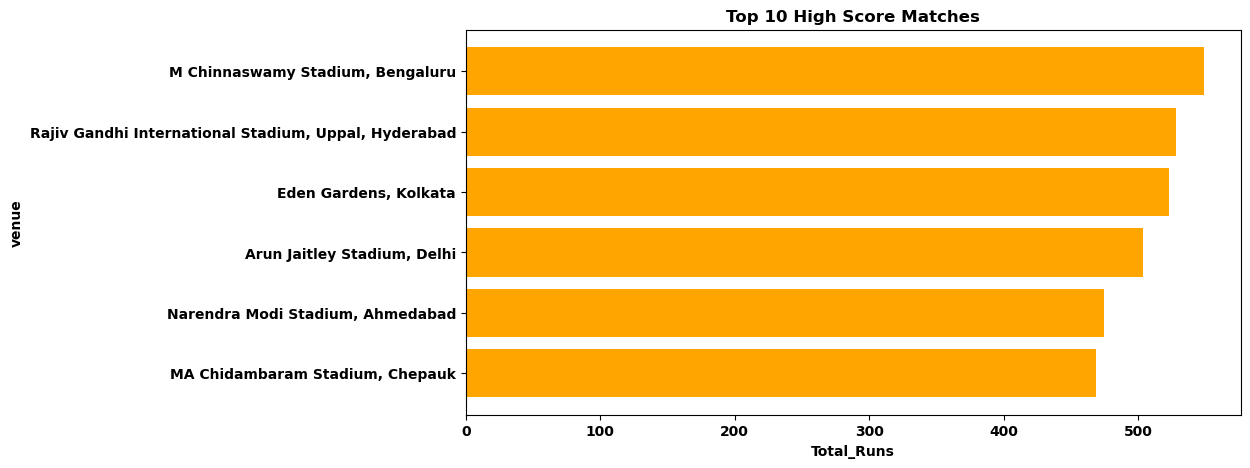

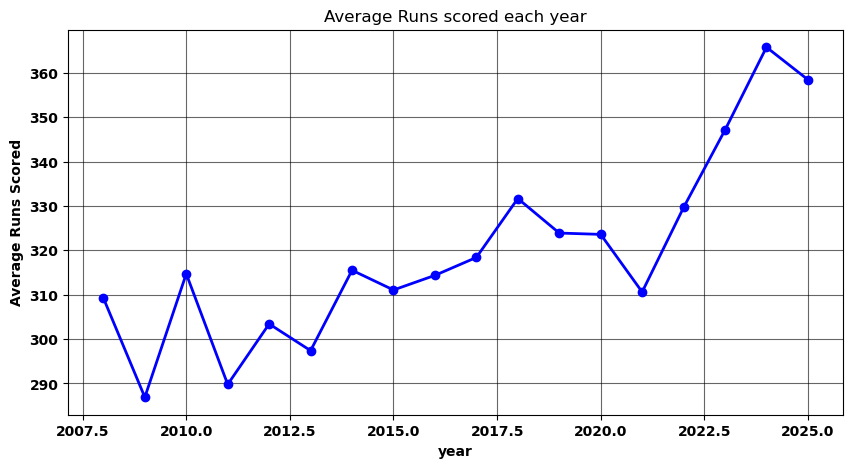

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Read the csv file
df = pd.read_csv("/home/abantika/Data Analytics/Match_Insights/Data/IPL.csv")

print("Shape before Cleaning:",df.shape)  #(ROws,COls)
#df.head()     #Preview the first few rows
df.info()     #Show the datatype and non-missing values
#df.describe(include = "all")  #Describe the statistics
print(df.isnull().sum())       #How many total missing cols

'''
#CLeaning using Pandas
cols_to_drop = [ "review_decision", "result_type",
    "method", "extra_type","stage","match_number",
    "player_out", "fielders", "runs_target", "review_batter",
    "team_reviewed", "umpire", "superover_winner"]

'''
#df.drop(columns= cols_to_drop, inplace = True, errors="ignore")

#Fill missing values in "next_batter"and other cols
#with 0 instead of dropping bcz contains some values

#cols_to_fill =["extra_type", "player_out", "runs_target","fielders","wicket_kind","new_batter"]
#df[cols_to_fill]=df[cols_to_fill].fillna(0)

df["wicket_kind"]=df["wicket_kind"].fillna("Unknown")
df["next_batter"] = df["next_batter"].replace(0, "unknown")
df.drop("stage", axis=1 ,inplace=True)   #axis=1 drop column


Cleaned_IPL_Dataset= "/home/abantika/Data Analytics/Match_Insights/Data/Cleaned_IPL_Dataset.csv"
df.to_csv(Cleaned_IPL_Dataset,index = False)
print("The shape after Cleaning the IPL Dataset:", df.shape)
print("Cleaned Dataset placed successfully at:",Cleaned_IPL_Dataset)



#**************************************************************

#Match Summary with resp cols and keeping them as regular cols without setting
#index to these cols using as_index="false"

match_summary =df.groupby(["match_id", "year", "venue", "match_won_by"], as_index=False).agg({"runs_total":"sum","wicket_kind":"count"})
match_summary.rename(columns={
    'runs_total': 'Total_Runs', 
    'wicket_kind': 'Total_Wickets'}, inplace=True)
match_summary.head(10)


#Total Runs scored in each match on specific venue
top_matches= match_summary.sort_values("Total_Runs",ascending = False).head(10)

#Plotting
plt.figure(figsize=(10,5))
plt.barh(top_matches["venue"],top_matches["Total_Runs"],color = "orange")#plt.barh(y,x)
plt.title("Top 10 High Score Matches",fontweight="bold")
plt.xlabel("Total_Runs",fontweight="bold")
plt.ylabel("venue",fontweight="bold")
plt.gca().invert_yaxis()       #y-axis invert to get the highest Run first
plt.xticks(fontweight= "bold") # Make Total_Runs on x-axis bold
plt.yticks(fontweight= "bold") # Make Venue on y -axis bold
plt.show()

#Average Runs scored per Year
Average_Runs_Scored = match_summary.groupby("year")["Total_Runs"].mean().reset_index()

#Plotting
plt.figure(figsize=(10,5))
plt.plot(Average_Runs_Scored["year"],Average_Runs_Scored["Total_Runs"],color ="blue",marker ="o",linewidth =2)#plt.plot(x,y)
plt.title("Average Runs scored each year")
plt.xlabel("year",fontweight="bold")
plt.ylabel("Average Runs Scored",fontweight = "bold")
plt.xticks(fontweight = "bold")
plt.yticks(fontweight = "bold")
plt.grid(alpha = 0.6,color = "black")
plt.show()



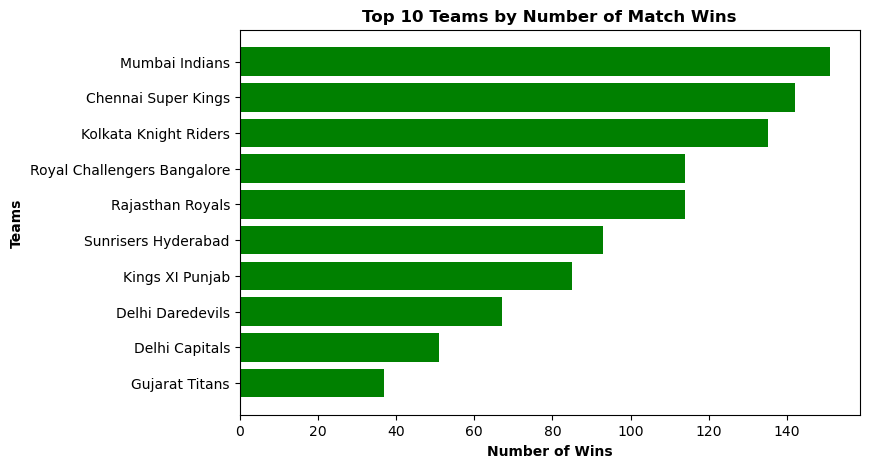

In [7]:
top_winners = match_summary['match_won_by'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.barh(top_winners.index, top_winners.values, color='green')
plt.title('Top 10 Teams by Number of Match Wins',fontweight = "bold")
plt.xlabel('Number of Wins', fontweight = "bold")
plt.ylabel('Teams',fontweight ="bold")
plt.gca().invert_yaxis()
plt.show()


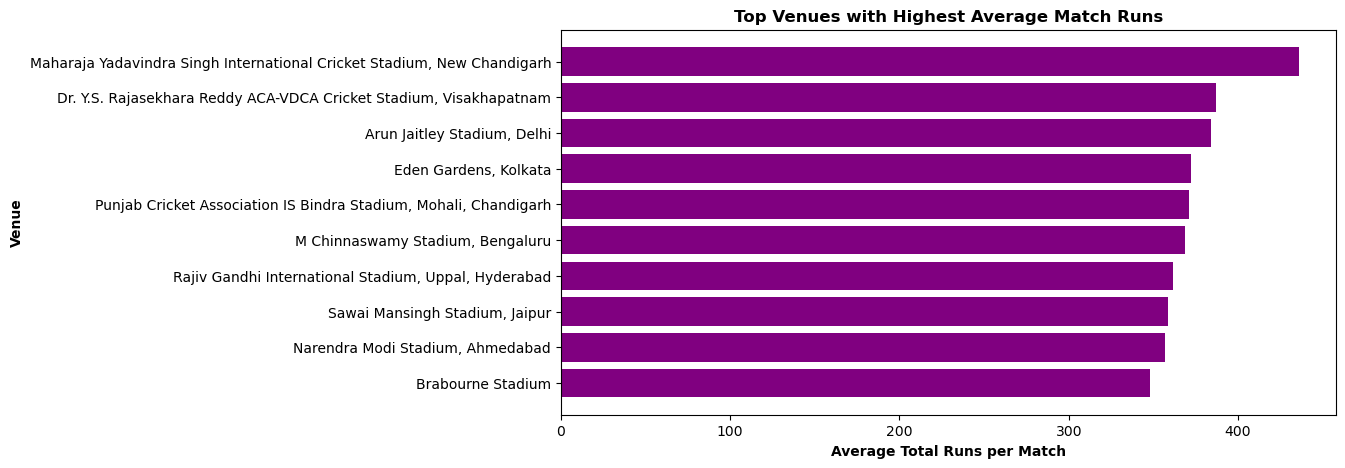

In [6]:
venue_avg = match_summary.groupby('venue')['Total_Runs'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(venue_avg.index, venue_avg.values, color='purple')
plt.title('Top Venues with Highest Average Match Runs',fontweight = "bold")
plt.xlabel('Average Total Runs per Match',fontweight = "bold")
plt.ylabel('Venue',fontweight = "bold")
plt.gca().invert_yaxis()
plt.show()
